##Assignment 2 by Ishita Gupta (ID: 49003344)

###Requirements:
>1. [Q1. loading the target dataset](https://colab.research.google.com/drive/1ITyV2uHCCNTFvGGYsJ8uBs0e95DnUlM-#scrollTo=QrAhkMxMHQ8p&line=3&uniqifier=1)
>2. [Q2. Implementing a baseline model](https://colab.research.google.com/drive/1ITyV2uHCCNTFvGGYsJ8uBs0e95DnUlM-#scrollTo=1QR_qwJE8mgy&line=4&uniqifier=1)
>3. [Q2. Test accuracy of baseline model](https://colab.research.google.com/drive/1ITyV2uHCCNTFvGGYsJ8uBs0e95DnUlM-#scrollTo=adH4CqBh9QuH&line=3&uniqifier=1)
>4. [Q2. Training and Validation curve](https://colab.research.google.com/drive/1ITyV2uHCCNTFvGGYsJ8uBs0e95DnUlM-#scrollTo=1QR_qwJE8mgy&line=4&uniqifier=1)
>5. [Q2. Experiment with learning rate and early stopping](https://colab.research.google.com/drive/1ITyV2uHCCNTFvGGYsJ8uBs0e95DnUlM-#scrollTo=1QR_qwJE8mgy&line=4&uniqifier=1)
>6. [Q3. Improving Performance](https://colab.research.google.com/drive/1ITyV2uHCCNTFvGGYsJ8uBs0e95DnUlM-#scrollTo=gDgYZ02CL-MF&line=3&uniqifier=1)
>7. [Q3. Training and Validation curve](https://colab.research.google.com/drive/1ITyV2uHCCNTFvGGYsJ8uBs0e95DnUlM-#scrollTo=qg_BfJ6_jscE&line=5&uniqifier=1)
>8. [Q3. Test accuracy of Improved model](https://colab.research.google.com/drive/1ITyV2uHCCNTFvGGYsJ8uBs0e95DnUlM-#scrollTo=lPVDlYj7Pb-p)
>9. [Q4. Data Augmentation](https://colab.research.google.com/drive/1ITyV2uHCCNTFvGGYsJ8uBs0e95DnUlM-#scrollTo=T-tr28ZjPcBr&line=9&uniqifier=1)
>10. [Q4. Reusing the Validation set](https://colab.research.google.com/drive/1ITyV2uHCCNTFvGGYsJ8uBs0e95DnUlM-#scrollTo=TW5VU4hgyMlb&line=2&uniqifier=1)
>11. [Q4. a) Bootstrap aggregating model](https://colab.research.google.com/drive/1ITyV2uHCCNTFvGGYsJ8uBs0e95DnUlM-#scrollTo=J8i9fiUsS7vI&line=2&uniqifier=1)
>12. [Q4. b) ensemble Bootstrap model result](https://colab.research.google.com/drive/1ITyV2uHCCNTFvGGYsJ8uBs0e95DnUlM-#scrollTo=B2hAu042leYf)
>12. [Q5. GPU vs CPU time](https://colab.research.google.com/drive/1ITyV2uHCCNTFvGGYsJ8uBs0e95DnUlM-#scrollTo=ebUFfNlYIlOX&line=8&uniqifier=1)




In [0]:
#importing libraries 
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import time
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

Using TensorFlow backend.


### MNIST Dataset

Here I download the dataset and preprocess it before splitting it into train, validation and test sets by using the train_test_split function twice to create a 5:1:1 ratio. Finally I divide the values by 255.0 to normalise it for easier processing.  

In [0]:
#downloading the dataset 
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

#dataset with 5:1:1 ratio 
x = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1428, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1666, random_state=1)

# Change range of pixel values from 0 - 255 to 0 - 1 for easier processing
x_train = x_train/ 255.0
x_val = x_val/255.0
x_test = x_test/ 255.0

#creating extra copies for Q4 part 2
x_train_copy = x_train
x_val_copy = x_val
x_test_copy = x_test


### Question 1
 
 I define a 2 layer baseline model. I carry out experiments with the learning rate based on curve plotted by train loss. I also plot the validation curve to check or under/over fitting and add early stopping to the best model. 

In [0]:
#Defining the layers of the different model
model_baseline = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.sigmoid)
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Accuracy for different Learning rates: 
1. 1e-1: 96.8 
2. 2e-2: 95.4
3. 3e-2: 96.2
4. 0.5e-1: 96.5

Adding callback to the model.fit function using Early stopping. The number of epochs was also chosen as 6 after experiments. 

In [0]:
#optimizer 
opt = tf.keras.optimizers.SGD(learning_rate= 1e-1)

#Compile the model
model_baseline.compile(optimizer=opt,
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

#Early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

#Train the model for specified epochs
history_baseline = model_baseline.fit( x_train,y_train, epochs = 6, validation_data=(x_val,y_val), callbacks=[es])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 50007 samples, validate on 9997 samples
Epoch 1/6
50007/50007 [==============================] - 3s 67us/sample - loss: 0.3655 - acc: 0.8953 - val_loss: 0.2119 - val_acc: 0.9381
Epoch 2/6
50007/50007 [==============================] - 3s 65us/sample - loss: 0.1749 - acc: 0.9483 - val_loss: 0.1455 - val_acc: 0.9564
Epoch 3/6
50007/50007 [==============================] - 3s 65us/sample - loss: 0.1253 - acc: 0.9639 - val_loss: 0.1175 - val_acc: 0.9643
Epoch 4/6
50007/50007 [==============================] - 3s 64us/sample - loss: 0.0989 - acc: 0.9709 - val_loss: 0.1067 - val_acc: 0.9666
Epoch 5/6
50007/50007 [==============================] - 3s 65us/sample - loss: 0.0807 - acc: 0.9760 - val_loss: 0.0999 - val_acc: 0.9675
Epoch 6/6
50007/50007 [==============================] - 3s 65us/sample - loss: 0.0678 - acc: 0.9804 - val_loss: 0.0890 - val_acc: 0.9723


### Training and Validation loss
plotting the loss curves for training loss in blue and validation loss in orange against the number of epochs

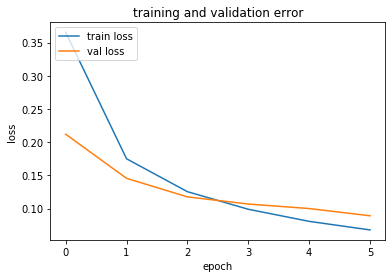

In [0]:
#training curve 
plt.plot(history_baseline.history['loss'])
plt.plot(history_baseline.history['val_loss'])
plt.title('training and validation error')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss','val loss'], loc='upper left')
plt.show()


Test accuracy of the best baseline model with 2 layers as defined above 

In [0]:
#Test accuracy
test_loss, test_acc = model_baseline.evaluate(x_test, y_test)
print('Test Accuracy:', test_acc)

9996/9996 [==============================] - 0s 30us/sample - loss: 0.0947 - acc: 0.9721
Test Accuracy: 0.9720888


###Q3. Improved Model

I added a dropout layer and increased number of hidden layers to better fit the curve after experimenting with different number of layers 

In [0]:
#Defining the layers of the different model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dropout(0.1, input_shape=(784, )),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.sigmoid)
])

Using SGD optimiser and Early stopping method I have increased the accuracy on the validation set. 

*I have used the time() function to calculate time taken in running the model. This is later used for Q5. CPU vs GPU time.*



In [0]:
#optimizer 
opt = tf.keras.optimizers.SGD(learning_rate= 1e-1)

#Compile the model
model.compile(optimizer=opt,
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

#Train the model for specified epochs
start = time.time()
history = model.fit( x_train,y_train, epochs = 6, validation_data=(x_val,y_val),callbacks=[es])
print ("time taken: %s"  % (time.time() - start))

Train on 50007 samples, validate on 9997 samples
Epoch 1/6
50007/50007 [==============================] - 5s 90us/sample - loss: 0.3842 - acc: 0.8807 - val_loss: 0.1619 - val_acc: 0.9503
Epoch 2/6
50007/50007 [==============================] - 4s 88us/sample - loss: 0.1459 - acc: 0.9552 - val_loss: 0.1202 - val_acc: 0.9651
Epoch 3/6
50007/50007 [==============================] - 4s 89us/sample - loss: 0.1088 - acc: 0.9660 - val_loss: 0.1009 - val_acc: 0.9691
Epoch 4/6
50007/50007 [==============================] - 4s 90us/sample - loss: 0.0865 - acc: 0.9733 - val_loss: 0.0843 - val_acc: 0.9738
Epoch 5/6
50007/50007 [==============================] - 5s 93us/sample - loss: 0.0744 - acc: 0.9760 - val_loss: 0.0777 - val_acc: 0.9756
Epoch 6/6
50007/50007 [==============================] - 5s 91us/sample - loss: 0.0621 - acc: 0.9797 - val_loss: 0.0802 - val_acc: 0.9730
Epoch 00006: early stopping
time taken: 27.172569513320923


Training loss and validation loss curve for improved model

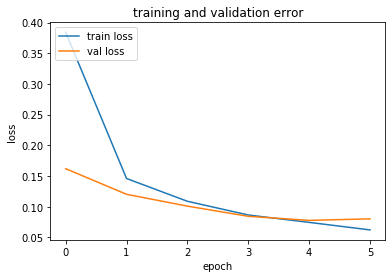

In [0]:
#training curve 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('training and validation error')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss','val loss'], loc='upper left')
plt.show()


Test accuracy for model which is above 97% (at the time of running the experiment with CPU: 97.43 %) 

In [0]:
#Test accuracy
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Accuracy:', test_acc)

9996/9996 [==============================] - 0s 33us/sample - loss: 0.0826 - acc: 0.9746
Test Accuracy: 0.9745898


###Data Augmentation

Using image warping by shfiting the image and changing the image size I create an augmented dataset 

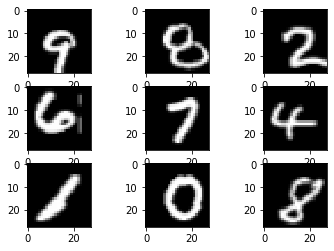

In [0]:
#data augmentation use image warping , colour jittering ..
# reshape 
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# convert from int to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# define data preparation
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True,width_shift_range=0.1, height_shift_range=0.1)
# fit parameters from data
datagen.fit(x_train)
# configure batch size and retrieve one batch of images
for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=32):
	# create a grid of 3x3 images
	for i in range(0, 9):
		plt.subplot(330 + 1 + i)
		plt.imshow(x_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
	# show the plot
	plt.show()
	break

Defining model for augmented dataset using the parameters found in the best case in previous question

In [0]:
#Build the model by defining the layers
model_augmented = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28,1)),
    keras.layers.Dropout(0.1, input_shape=(784, )),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.sigmoid)
])

#Compile the model
model_augmented.compile(optimizer=opt,
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [0]:

# fits the model on batches with real-time data augmentation:
model_augmented.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
                    steps_per_epoch=len(x_train) / 32, epochs=6)

Epoch 1/6
1563/1562 [==============================] - 17s 11ms/step - loss: 0.5120 - acc: 0.8344
Epoch 2/6
1563/1562 [==============================] - 17s 11ms/step - loss: 0.2364 - acc: 0.9257
Epoch 3/6
1563/1562 [==============================] - 17s 11ms/step - loss: 0.1934 - acc: 0.9414
Epoch 4/6
1563/1562 [==============================] - 17s 11ms/step - loss: 0.1693 - acc: 0.9470
Epoch 5/6
1563/1562 [==============================] - 17s 11ms/step - loss: 0.1527 - acc: 0.9522
Epoch 6/6
1563/1562 [==============================] - 17s 11ms/step - loss: 0.1443 - acc: 0.9551


Test accuracy after augmenting dataset

In [0]:
#Test accuracy
test_loss, test_acc = model_augmented.evaluate(x_test, y_test)
print('Test Accuracy:', test_acc)

9996/9996 [==============================] - 0s 35us/sample - loss: 0.6674 - acc: 0.8598
Test Accuracy: 0.8598439


###Second Round Training 

I concatenate the training and validation set. Then I define a new early stopping criterion based on training loss. Finally, I train on the previously trainined best model in Question 3. 

*Note: As I already trained on train and val set in Q3. until the optimal point, here I will directly train further on the concatenated dataset.*

In [0]:
#second round reusing validation set
x_total = np.concatenate((x_train_copy, x_val_copy))
y_total = np.concatenate((y_train, y_val))

# simple early stopping
es_total = EarlyStopping(monitor='loss', mode='min', verbose=1)

history = model.fit( x_total,y_total, epochs = 4,callbacks=[es_total])

Train on 60004 samples
Epoch 1/4
60004/60004 [==============================] - 5s 83us/sample - loss: 0.0598 - acc: 0.9809
Epoch 2/4
60004/60004 [==============================] - 5s 83us/sample - loss: 0.0522 - acc: 0.9832
Epoch 3/4
60004/60004 [==============================] - 5s 82us/sample - loss: 0.0485 - acc: 0.9841
Epoch 4/4
60004/60004 [==============================] - 5s 83us/sample - loss: 0.0407 - acc: 0.9867


On comparing the curves we see that the training loss has *decreased* compared to the previous curve for improved model.  

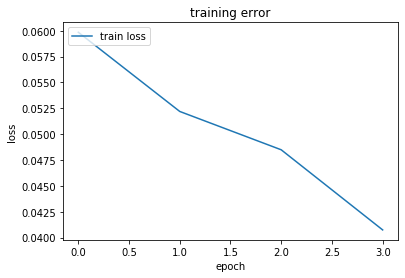

In [0]:
#training curve 
plt.plot(history.history['loss'])
plt.title('training error')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss'], loc='upper left')
plt.show()


The test accuracy of the model after second round of training

In [0]:
#Test accuracy
test_loss, test_acc = model.evaluate(x_test_copy, y_test)
print('Test Accuracy:', test_acc)

9996/9996 [==============================] - 0s 34us/sample - loss: 0.0800 - acc: 0.9756
Test Accuracy: 0.9755902


###Bootstrap Aggregating 

I define a new model based on the parameters of Q3

In [0]:
#Defining the layers of the different model
model_bagging = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dropout(0.1, input_shape=(784, )),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.sigmoid)
])

#optimizer 
opt = tf.keras.optimizers.SGD(learning_rate= 1e-1)

#Compile the model
model_bagging.compile(optimizer=opt,
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])


###Implementing Bootstrap Aggregation algorithm

For creating the effect of training the model in a biased fashion for mutliple runs, I randomly sample 10,000 images from the training set and set aside the rest as a validation set for that run. This process is run 10 times so that each of the 10 times the model is trained to detect a certain image in a biased manner. The test accuracy on the original test dataset is also reported after each training set. 

In [0]:
#ensemble methods Bootstrapping aggregation  
# multiple train-test splits
for _ in range(10):
  # select indexes
  ix = [i for i in range(len(x_train_copy))]
  train_ix = resample(ix, replace=True, n_samples=10000)
  val_ix = [x for x in ix if x not in train_ix]
  # select data
  trainX, trainy = x_train_copy[train_ix], y_train[train_ix]
  valX, valy = x_train_copy[val_ix], y_train[val_ix]
  # evaluate model
  history = model_bagging.fit(trainX, trainy, validation_data=(valX, valy))
  test_loss, test_acc = model_bagging.evaluate(x_test_copy, y_test)
  print('Test Accuracy:', test_acc)
  

Train on 10000 samples, validate on 40929 samples
9996/9996 [==============================] - 0s 35us/sample - loss: 0.3398 - acc: 0.9014
Test Accuracy: 0.9013606
Train on 10000 samples, validate on 40930 samples
9996/9996 [==============================] - 0s 35us/sample - loss: 0.3286 - acc: 0.8957
Test Accuracy: 0.89565825
Train on 10000 samples, validate on 40969 samples
9996/9996 [==============================] - 0s 34us/sample - loss: 0.2960 - acc: 0.9048
Test Accuracy: 0.9047619
Train on 10000 samples, validate on 40952 samples
9996/9996 [==============================] - 0s 33us/sample - loss: 0.2577 - acc: 0.9176
Test Accuracy: 0.917567
Train on 10000 samples, validate on 41002 samples
9996/9996 [==============================] - 0s 34us/sample - loss: 0.2240 - acc: 0.9343
Test Accuracy: 0.9342737
Train on 10000 samples, validate on 40936 samples
9996/9996 [==============================] - 0s 37us/sample - loss: 0.1683 - acc: 0.9492
Test Accuracy: 0.94917965
Train on 10000 

The test accuracy of the ensemble model after Bagging technique

In [0]:
test_loss, test_acc = model_bagging.evaluate(x_test_copy, y_test)
print('Test Accuracy:', test_acc)

9996/9996 [==============================] - 0s 34us/sample - loss: 0.1423 - acc: 0.9567
Test Accuracy: 0.9566827


### GPU vs. CPU time

The Improved model in Q3. was run using google GPU and local CPU. 
The time difference is as calculated :
1. GPU - 32.7931113243103 seconds 
2. CPU - 26.35969066619873 seconds

Due to the small size of dataset the CPU is able to process it quickly however for a larger amount of dataset using a GPU will be better 